# IMPORTS

In [2]:
import torch, torchvision
import pandas as pd
import numpy as np
from PIL import Image


## Load data

In [3]:
dataset = pd.read_csv("Downloads/table.csv")
dataset.head()

# print (dataset[dataset.rxnavImageFileName == "00093-0311-01_RXNAVIMAGE10_26211358.jpg"].name)

,ndc11,rxcui,name,rxnavImageObjectId,rxnavImageFileName,nlmImageFileName,RXNAV 120,RXBASE 120,RXNAV 300,RXBASE 300,RXNAV 600,RXBASE 600,RXNAV 800,RXBASE 800,RXNAV 1024,RXBASE 1024,RXNAV ORIGINAL,RXBASE ORIGINAL
0,00093-0311-01,978006,Loperamide Hydrochloride 2 MG Oral Capsule,185643662,00093-0311-01_RXNAVIMAGE10_26211358.jpg,00093-0311-01_NLMIMAGE10_6315B1FD.jpg,image/images/gallery/120/00093-0311-01_RXNAVIM...,image/images/gallery/120/00093-0311-01_NLMIMAG...,image/images/gallery/300/00093-0311-01_RXNAVIM...,image/images/gallery/300/00093-0311-01_NLMIMAG...,image/images/gallery/600/00093-0311-01_RXNAVIM...,image/images/gallery/600/00093-0311-01_NLMIMAG...,image/images/gallery/800/00093-0311-01_RXNAVIM...,image/images/gallery/800/00093-0311-01_NLMIMAG...,image/images/gallery/1024/00093-0311-01_RXNAVI...,image/images/gallery/1024/00093-0311-01_NLMIMA...,image/images/gallery/original/00093-0311-01_RX...,image/images/gallery/original/00093-0311-01_NL...
1,00093-3165-01,197985,Minocycline 50 MG Oral Capsule,185646490,00093-3165-01_RXNAVIMAGE10_36231B28.jpg,00093-3165-01_NLMIMAGE10_19270CA8.jpg,image/images/gallery/120/00093-3165-01_RXNAVIM...,image/images/gallery/120/00093-3165-01_NLMIMAG...,image/images/gallery/300/00093-3165-01_RXNAVIM...,image/images/gallery/300/00093-3165-01_NLMIMAG...,image/images/gallery/600/00093-3165-01_RXNAVIM...,image/images/gallery/600/00093-3165-01_NLMIMAG...,image/images/gallery/800/00093-3165-01_RXNAVIM...,image/images/gallery/800/00093-3165-01_NLMIMAG...,image/images/gallery/1024/00093-3165-01_RXNAVI...,image/images/gallery/1024/00093-3165-01_NLMIMA...,image/images/gallery/original/00093-3165-01_RX...,image/images/gallery/original/00093-3165-01_NL...
2,00093-0810-01,198045,Nortriptyline 10 MG Oral Capsule,185646437,00093-0810-01_RXNAVIMAGE10_24231228.jpg,00093-0810-01_NLMIMAGE10_34271A58.jpg,image/images/gallery/120/00093-0810-01_RXNAVIM...,image/images/gallery/120/00093-0810-01_NLMIMAG...,image/images/gallery/300/00093-0810-01_RXNAVIM...,image/images/gallery/300/00093-0810-01_NLMIMAG...,image/images/gallery/600/00093-0810-01_RXNAVIM...,image/images/gallery/600/00093-0810-01_NLMIMAG...,image/images/gallery/800/00093-0810-01_RXNAVIM...,image/images/gallery/800/00093-0810-01_NLMIMAG...,image/images/gallery/1024/00093-0810-01_RXNAVI...,image/images/gallery/1024/00093-0810-01_NLMIMA...,image/images/gallery/original/00093-0810-01_RX...,image/images/gallery/original/00093-0810-01_NL...
3,00093-0811-01,317136,Nortriptyline 25 MG Oral Capsule,185646420,00093-0811-01_RXNAVIMAGE10_20231018.jpg,00093-0811-01_NLMIMAGE10_15270A98.jpg,image/images/gallery/120/00093-0811-01_RXNAVIM...,image/images/gallery/120/00093-0811-01_NLMIMAG...,image/images/gallery/300/00093-0811-01_RXNAVIM...,image/images/gallery/300/00093-0811-01_NLMIMAG...,image/images/gallery/600/00093-0811-01_RXNAVIM...,image/images/gallery/600/00093-0811-01_NLMIMAG...,image/images/gallery/800/00093-0811-01_RXNAVIM...,image/images/gallery/800/00093-0811-01_NLMIMAG...,image/images/gallery/1024/00093-0811-01_RXNAVI...,image/images/gallery/1024/00093-0811-01_NLMIMA...,image/images/gallery/original/00093-0811-01_RX...,image/images/gallery/original/00093-0811-01_NL...
4,00093-0812-01,198046,Nortriptyline 50 MG Oral Capsule,185646464,00093-0812-01_RXNAVIMAGE10_2D2316D8.jpg,00093-0812-01_NLMIMAGE10_DD0E6EE3.jpg,image/images/gallery/120/00093-0812-01_RXNAVIM...,image/images/gallery/120/00093-0812-01_NLMIMAG...,image/images/gallery/300/00093-0812-01_RXNAVIM...,image/images/gallery/300/00093-0812-01_NLMIMAG...,image/images/gallery/600/00093-0812-01_RXNAVIM...,image/images/gallery/600/00093-0812-01_NLMIMAG...,image/images/gallery/800/00093-0812-01_RXNAVIM...,image/images/gallery/800/00093-0812-01_NLMIMAG...,image/images/gallery/1024/00093-0812-01_RXNAVI...,image/images/gallery/1024/00093-0812-01_NLMIMA...,image/images/gallery/original/00093-0812-01_RX...,image/images/gallery/original/00093-0812-01_NL...


In [4]:
model = torchvision.models.vgg16(pretrained= True)
# model.layer1 = torch.nn.Sequential()
# model.layer2 = torch.nn.Sequential()
# model.layer3 = torch.nn.Sequential()
# model.layer4 = torch.nn.Sequential()
# # model.avgpool = torch.nn.Sequential()
model.classifier = torch.nn.Sequential()
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

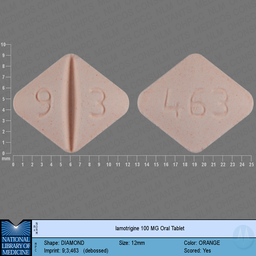

1024 896


In [5]:
img = Image.open(r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\original\00093-0463-01_RXNAVIMAGE10_5429AA3D.jpg")

width, height = img.size

img_cropped = img.resize((256,256), Image.ANTIALIAS)

display(img_cropped)
print(width, height)

# Other temp

In [5]:
from torchvision import transforms
img_trans = transforms.Compose([transforms.Resize((128, 128)),
                                transforms.CenterCrop(100),
#                                 transforms.ToTensor(),
                               ])
img_trans


Compose(
    Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(100, 100))
)

In [ ]:
#Cropped images are stored into new directory 

import os
def main(): 
    # path of the folder containing the raw images 
    inPath =r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\original"
  
    # path of the folder that will contain the modified image 
    outPath =r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped"
  
    for imagePath in os.listdir(inPath): 
        # imagePath contains name of the image  
        inputPath = os.path.join(inPath, imagePath) 
                  
        # inputPath contains the full directory name 
        im = Image.open(inputPath)
        width, height = im.size
        img_cropped = im.crop((70,0,width,height -170))
        img_cropped = img_trans(img_cropped)
        


        fullOutPath = os.path.join(outPath, imagePath)
        img_cropped.save(fullOutPath)

 
  
        print(fullOutPath)

if __name__ == '__main__': 
    main()    


In [7]:
img_to_tensor = transforms.ToTensor() 

In [8]:
batches = []

import glob

root_dir = r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped"


for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    print(filename)
    im = Image.open(filename)
    imResize = img_to_tensor(im)
    batches.append(imResize)



C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3228-30_RXNAVIMAGE10_391E1C80.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3229-30_RXNAVIMAGE10_3E1E1F50.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3235-60_RXNAVIMAGE10_1B158D9C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3238-30_RXNAVIMAGE10_361E1B30.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3239-30_RXNAVIMAGE10_3F1E1F80.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3240-30_RXNAVIMAGE10_A91354BA.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3250-30_RXNAVIMAGE10_431E21C1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00002-3251-30_RXNAVIMAGE10_451E2281.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00078-0314-34_RXNAVIMAGE10_F6157B0B.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00078-0324-44_RXNAVIMAGE10_39159CCC.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00078-0337-05_RXNAVIMAGE10_DC126E13.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00078-0379-05_RXNAVIMAGE10_6115B0AD.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00078-0383-34_RXNAVIMAGE10_0E15870C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00078-0384-05_RXNAVIMAGE10_052102A8.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00078-0406-05_RXNAVIMAGE10_5E15AF2D.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00078-0456-05_RXNAVIMAGE10_D5126A83.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-4346-56_RXNAVIMAGE10_6935B4DD.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-4356-01_RXNAVIMAGE10_0E210728.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-4742-01_RXNAVIMAGE10_CE23671B.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-5105-56_RXNAVIMAGE10_B31B59DA.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-5112-98_RXNAVIMAGE10_4E2D2719.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-5117-98_RXNAVIMAGE10_522D2929.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-5118-98_RXNAVIMAGE10_452D2299.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-5119-98_RXNAVIMAGE10_492D24A9.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7386-56_RXNAVIMAGE10_9612CB46.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7394-98_RXNAVIMAGE10_3B381DA0.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7436-01_RXNAVIMAGE10_8D3046B2.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7437-01_RXNAVIMAGE10_80304022.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7438-01_RXNAVIMAGE10_84304232.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7442-56_RXNAVIMAGE10_30271848.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7443-56_RXNAVIMAGE10_052702B8.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00093-7465-98_RXNAVIMAGE10_1C380E40.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00173-0809-61_RXNAVIMAGE10_D11968CB.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00173-0824-18_RXNAVIMAGE10_DD196EFB.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00173-0949-55_RXNAVIMAGE10_3219995C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00173-0991-55_RXNAVIMAGE10_D7196BCB.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00182-0679-89_RXNAVIMAGE10_41352089.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00185-0104-01_RXNAVIMAGE10_2C33966C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00185-0122-01_RXNAVIMAGE10_E10E7093.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00185-0124-01_RXNAVIMAGE10_AA23551A.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00378-1815-01_RXNAVIMAGE10_4423A22D.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00378-1819-01_RXNAVIMAGE10_3F239FBC.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00378-1821-01_RXNAVIMAGE10_4D23A6AD.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00378-1823-01_RXNAVIMAGE10_D723EBAF.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00378-2180-01_RXNAVIMAGE10_8F23479A.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00378-2264-01_RXNAVIMAGE10_BD34DEE6.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00378-2302-01_RXNAVIMAGE10_214590FC.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00378-2537-01_RXNAVIMAGE10_04268244.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0588-01_RXNAVIMAGE10_77303BA1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0589-01_RXNAVIMAGE10_172F8B9C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0590-01_RXNAVIMAGE10_0E2F871C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0633-02_RXNAVIMAGE10_72303931.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0634-02_RXNAVIMAGE10_670533F9.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0635-09_RXNAVIMAGE10_92304922.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0658-02_RXNAVIMAGE10_FA41FD3F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00555-0787-02_RXNAVIMAGE10_B241D93E.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00603-2540-21_RXNAVIMAGE10_45042291.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00603-2545-21_RXNAVIMAGE10_F223797B.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00603-2957-21_RXNAVIMAGE10_46232309.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00603-2958-21_RXNAVIMAGE10_1A338D6C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00603-3265-21_RXNAVIMAGE10_8234C146.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00603-3339-21_RXNAVIMAGE10_44392249.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00603-3340-21_RXNAVIMAGE10_8851C40E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\00603-3442-28_RXNAVIMAGE10_4805A47D.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\10144-0604-15_RXNAVIMAGE10_F21DF94F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\10144-0606-15_RXNAVIMAGE10_FA1DFD0F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\10147-1700-03_RXNAVIMAGE10_E60E7363.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\10337-0815-06_RXNAVIMAGE10_7203B95D.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\10370-0510-10_RXNAVIMAGE10_36059B4C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\12496-1283-02_RXNAVIMAGE10_281D940C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\12496-1306-02_RXNAVIMAGE10_111D889C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\13107-0003-34_RXNAVIMAGE10_7C08BE65.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\42806-0503-01_RXNAVIMAGE10_423EA145.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\42865-0100-02_RXNAVIMAGE10_4815A41D.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\42865-0302-02_RXNAVIMAGE10_78473C79.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\43386-0660-24_RXNAVIMAGE10_D91DECBF.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\43478-0900-88_RXNAVIMAGE10_ED0E7693.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\43478-0903-88_RXNAVIMAGE10_EA0E7513.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\43547-0249-50_RXNAVIMAGE10_C808E417.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\43547-0250-10_RXNAVIMAGE10_D708EBC7.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\51079-0936-20_RXNAVIMAGE10_57352BF9.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\51079-0937-20_RXNAVIMAGE10_1E350F18.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\51079-0942-05_RXNAVIMAGE10_CF33E7CF.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\51079-0957-20_RXNAVIMAGE10_15340AA0.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\51079-0960-20_RXNAVIMAGE10_9532CAC6.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\51079-0985-20_RXNAVIMAGE10_59342CC1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\51079-0986-20_RXNAVIMAGE10_E733F3FF.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\51079-0997-20_RXNAVIMAGE10_37351BA8.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0158-10_RXNAVIMAGE10_BD38DEF6.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0159-01_RXNAVIMAGE10_DA0E6D63.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0170-05_RXNAVIMAGE10_58052C19.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0172-90_RXNAVIMAGE10_FD07FE9F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0179-15_RXNAVIMAGE10_7F0EBF85.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0180-15_RXNAVIMAGE10_D31D69AB.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0192-01_RXNAVIMAGE10_ED07F68F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\55111-0207-81_RXNAVIMAGE10_D616EB47.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\59762-5024-01_RXNAVIMAGE10_4D26A6A5.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\59762-5026-01_RXNAVIMAGE10_26349324.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\59762-8398-01_RXNAVIMAGE10_E71273E3.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60258-0162-01_RXNAVIMAGE10_910EC886.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60258-0186-01_RXNAVIMAGE10_4B15A5CD.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60505-0014-06_RXNAVIMAGE10_633831B1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60505-0015-06_RXNAVIMAGE10_75383AB1.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\60505-0016-06_RXNAVIMAGE10_7A383D51.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\62756-0259-02_RXNAVIMAGE10_F6387B03.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\62756-0402-03_RXNAVIMAGE10_BA505D22.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\62756-0797-88_RXNAVIMAGE10_50342841.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63304-0165-30_RXNAVIMAGE10_B633DB0E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63304-0191-30_RXNAVIMAGE10_AA405562.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63304-0192-30_RXNAVIMAGE10_9544CA96.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63304-0240-01_RXNAVIMAGE10_4D3DA69D.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\63304-0479-01_RXNAVIMAGE10_4C3DA66D.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\65862-0584-01_RXNAVIMAGE10_6439B24D.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\65862-0585-01_RXNAVIMAGE10_9E51CF4E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\65862-0586-05_RXNAVIMAGE10_9051C85E.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\65862-0587-01_RXNAVIMAGE10_33489994.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\65862-0598-05_RXNAVIMAGE10_7A51BD1D.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\65862-0697-90_RXNAVIMAGE10_F84CFC27.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\65862-0927-90_RXNAVIMAGE10_C249E15F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\66424-0020-01_RXNAVIMAGE10_1A038D6C.jpg
C:\Users\mistr\Downloads\image-2

C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68382-0198-16_RXNAVIMAGE10_FA0DFD1F.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68382-0261-01_RXNAVIMAGE10_DB12ED97.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68382-0702-01_RXNAVIMAGE10_895144BA.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68453-0850-75_RXNAVIMAGE10_12200910.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68462-0126-05_RXNAVIMAGE10_2807947C.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68462-0127-05_RXNAVIMAGE10_2B0795CC.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68462-0128-01_RXNAVIMAGE10_024D0138.jpg
C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped\68462-0129-01_RXNAVIMAGE10_024D0108.jpg
C:\Users\mistr\Downloads\image-2

In [8]:
batch = torch.stack(batches)
batch.shape
# img = batch[0].unsqueeze(0)
# print(img.shape)
start_index = 0
end_index = len(batch)
batch_main = batch[start_index:end_index] 

In [17]:
output = model(batch_main)

In [18]:
output.shape

torch.Size([1153, 25088])

output = model(batch)
output.shape

feats2 = output[0]
feats2
torch.save(feats2, "train.pt")


In [9]:



for i in range(0,len(output)):
    torch.save(output[i], "feats" + str(i+start_index)+ ".pt")
    

NameError: name 'output' is not defined

In [15]:
from torchvision import transforms
img_trans1 = transforms.Compose([transforms.Resize((128, 128)),
                                 transforms.CenterCrop(100),
#                                 transforms.ToTensor(),
                               ])
img_trans


Compose(
    Resize(size=(128, 128), interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(100, 100))
)

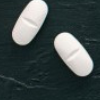

In [16]:
test_img = Image.open("jar-covid-19-test-pills-near-ribbon-italian-flag_115390-104.jpg").convert('RGB')
# width, height = test_img.size
# img_cropped1 = test_img.crop((70,0,width,height -170))
#display(img_cropped1)
# img_cropped1.size
test_img1 = img_trans1(test_img)
display(test_img1)
test_img1 = img_to_tensor(test_img1)


In [17]:
output_batch = torch.stack([test_img1])
output_batch[0].shape

output_img = output_batch[0].unsqueeze(0)
output_img.shape

torch.Size([1, 3, 100, 100])

In [18]:
test_output = model(output_img)
test_sim = test_output[0]
test_sim.shape

torch.Size([25088])

feats4 = torch.load("feats1152.pt")

result1 = torch.nn.functional.cosine_similarity(feats4, test_sim, dim=0)

print(result1)
result1.item()

In [19]:
path = r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\model data"
resultmain = 0
maxi= float(0) 
for i in range (0, 1153):
    feat_model = torch.load(path+"\\feats" + str(i) + ".pt") 
   

    result = torch.nn.functional.cosine_similarity(feat_model, test_sim, dim=0)
#     print (result.item())
    if(result.item() >= maxi):
        maxi = result.item()
        print(maxi)
        resultmain = i
        
resultmain
     
    

0.16631506383419037
0.19161777198314667
0.19322267174720764
0.47650882601737976
0.5373058915138245
0.5713356733322144
0.5965271592140198
0.5998325943946838


487

905    Acetaminophen 500 MG / Hydrocodone Bitartrate ...
Name: name, dtype: object accurancy  59.983259439468384


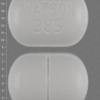

In [20]:
import glob
import os

root_dir = r"C:\Users\mistr\Downloads\image-20201010T200227Z-004\image\images\gallery\cropped"

k = 0;
l = 0;

for filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):

    if(k==resultmain):
        basename = os.path.basename(filename)
        
        if maxi < 0.48:
            print("pill not found in dataset", "accurancy too low: ", maxi*100)
            
        else:
            if maxi < 0.85:
                print (dataset[dataset.rxnavImageFileName == basename].name, "accurancy ", maxi*100)
            else:
                print (dataset[dataset.rxnavImageFileName == basename].name)
                
        
        im = Image.open(filename)
        display(im)
    k += 1
